In [1]:
# Section 1: Imports & Setup
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

# GPU Check
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available: 1


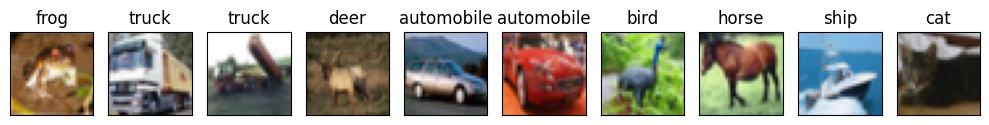

In [2]:
# Section 2: Load & Normalize CIFAR-10
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()

class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

# View 10 Sample Images
plt.figure(figsize=(10,2))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.xticks([]); plt.yticks([])
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i]])
plt.tight_layout()
plt.show()

In [3]:
# Section 3: Build CNN Model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.summary()

/Users/sameerkhan/anaconda3/envs/skhan3/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-04-19 22:34:07.499044: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2025-04-19 22:34:07.499225: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-04-19 22:34:07.499237: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2025-04-19 22:34:07.499645: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-04-19 22:34:07.500178: I tensorflow/core/common_runtime/pluggable_device/pluggable_devic

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
# Section 4: Compile & Train
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, validation_split=0.1)

Epoch 1/10


2025-04-19 22:34:16.175010: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.3417 - loss: 1.7888 - val_accuracy: 0.5218 - val_loss: 1.3279
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 16s 12ms/step - accuracy: 0.5429 - loss: 1.2962 - val_accuracy: 0.6014 - val_loss: 1.1524
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.5835 - loss: 1.1948 - val_accuracy: 0.5402 - val_loss: 1.3945
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.5689 - loss: 1.3113 - val_accuracy: 0.4824 - val_loss: 1.7578
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.5100 - loss: 1.9153 - val_accuracy: 0.4170 - val_loss: 3.7178
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 16s 12ms/step - accuracy: 0.4633 - loss: 4.0536 - val_accuracy: 0.4146 - val_loss: 8.7213
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.4312 - loss: 13.0486 - val_accuracy: 0.3570 - val_loss: 38.8783
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.3822 - loss: 52

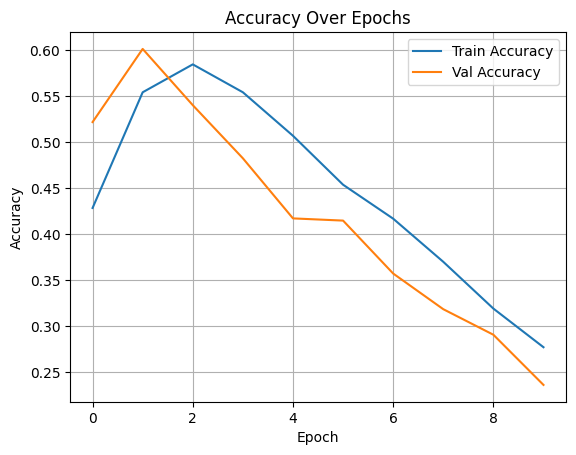

In [5]:
# Section 5: Accuracy & Loss Plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("Accuracy Over Epochs")
plt.xlabel("Epoch"); plt.ylabel("Accuracy")
plt.legend()
plt.grid(); plt.show()

In [6]:
# Section 6: Evaluate on Test Data
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.2f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.2420 - loss: 3078.9346
Test Accuracy: 0.25


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step


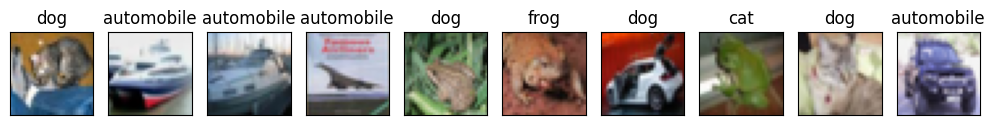

In [7]:
# Section 7: Predict Some Test Images
preds = model.predict(x_test[:10])
plt.figure(figsize=(10,2))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(x_test[i])
    plt.xticks([]); plt.yticks([])
    plt.title(class_names[np.argmax(preds[i])])
plt.tight_layout()
plt.show()